In [1]:
# Read-in imdb data
import csv

movies = {}

with open('imdb_dataset_v7.2_6_actors_complete.tsv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter = "\t")
    for entry in reader:
        movies[
            entry["title"]
        ] = {
        "director":     entry["director"],
        "rating":       entry["rating"],
        "votes":        entry["votes"],
        "year":         entry["year"],
        "genre":        entry["genre"],
        "gross":        entry["gross"],
        "budget":       entry["budget"],
        "run-time":     entry["run-time"] ,
        "actor1":       entry["actor1"],
        "actor1_rank":  entry["actor1_rank"],
        "actor1_sex":   entry["actor1_sex"],
        "actor2":       entry["actor2"],
        "actor2_rank":  entry["actor2_rank"],
        "actor2_sex":   entry["actor2_sex"],
        "actor3":       entry["actor3"],
        "actor3_rank":  entry["actor3_rank"],
        "actor3_sex":   entry["actor3_sex"],
        "actor4":       entry["actor4"],
        "actor4_rank":  entry["actor4_rank"],
        "actor4_sex":   entry["actor4_sex"],
        "actor5":       entry["actor5"],
        "actor5_rank":  entry["actor5_rank"],
        "actor5_sex":   entry["actor5_sex"],
        "actor6":       entry["actor6"],
        "actor6_rank":  entry["actor6_rank"],
        "actor6_sex":   entry["actor6_sex"],
        "plot":         entry["plot"]
        }

In [2]:
# List of terms associated with movie script writing
movie_scripts_terms = ['written', 'int', 'ext', 'day', 'night', 'morning',
                       'evening' 'fade', 'cut', 'continued', 'cont']

In [3]:
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Function for getting tokens from text
def tokens(text):
    # Remove numbers
    no_numbers = re.sub(r'\d+(\.\d+)?', '', text)

    # Lowercase everything
    words_lowercase = no_numbers.lower()

    # Remove punctuations and tokenize
    tokens_rm_punct = RegexpTokenizer(r'\w+')
    tokens_without_punct = tokens_rm_punct.tokenize(words_lowercase)

    # Remove stop words
    no_stop_words = [word for word in tokens_without_punct if word not in stopwords.words('english')]
    
    # Remove terms associated with movie script writing
    no_movie_script_terms = [word for word in no_stop_words if word not in movie_scripts_terms]
    
    # Remove words that have less than 2 characters
    filtered_words = [word for word in no_movie_script_terms if len(word) > 2]

    return filtered_words

In [4]:
import os
import io

# Read-in movie scripts and add words to a dictonary of tokens
path = './scripts/'

scripts_tokens = {}
for filename in os.listdir(path):
    if("." in filename[-5:]):
        # Replace '.' when it appears after the year in filenames with '/' to match the imdb dataset
        correct_movie_name = filename.replace(".", "/")
        
        f = io.open(path + filename, 'r', encoding='utf8')
        scripts_tokens[correct_movie_name] = tokens(f.read())
    else:
        f = io.open(path + filename, 'r', encoding='utf8')
        scripts_tokens[filename] = tokens(f.read())

In [104]:
token_string = ""
for i in scripts_tokens["Forrest Gump (1994)"]:
    token_string += i + " "

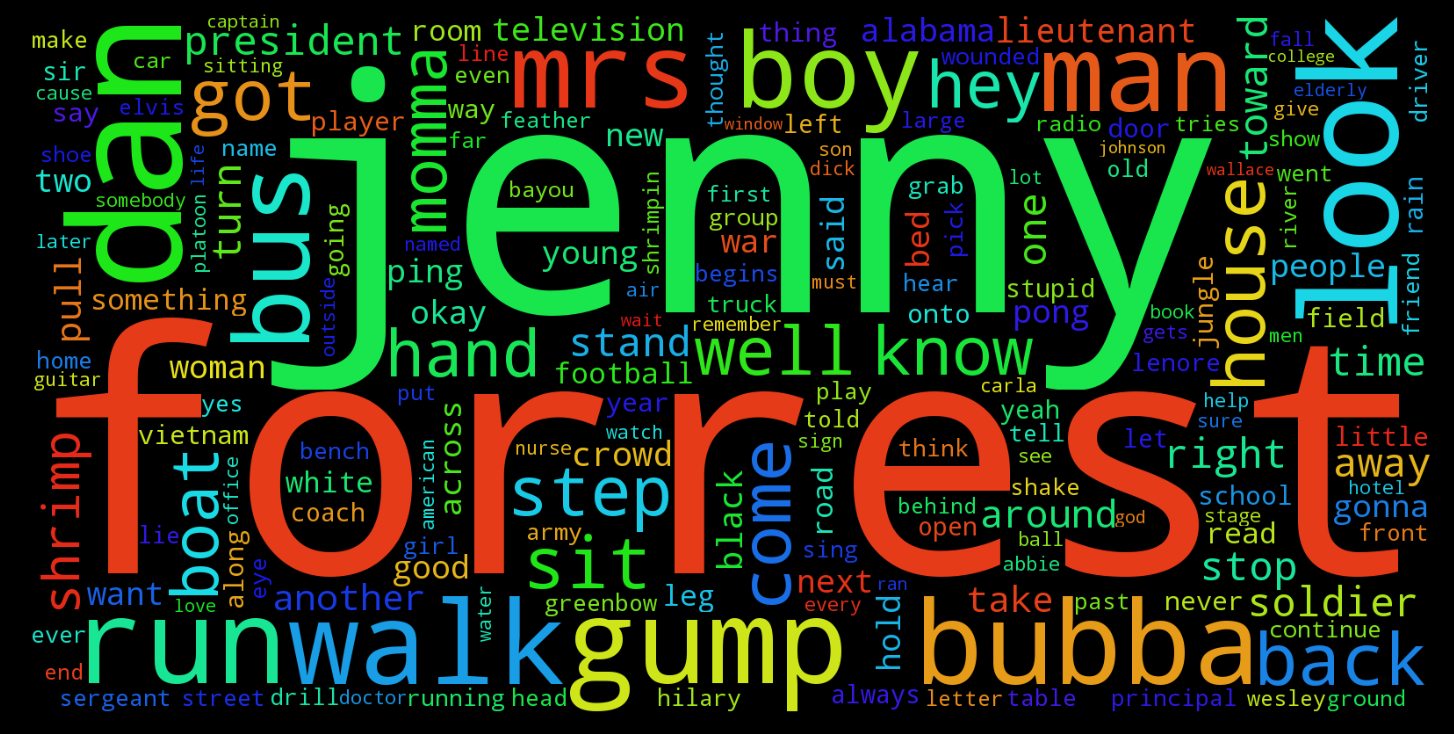

In [105]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
    
wordcloud = WordCloud(width=1600, height=800).generate(token_string)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [106]:
import csv

# Go through the data Data_Set_S1.txt and list words and their happiness average into a dictonary
word_sentiment_dic = {}
with open('./Data_Set_S1.txt', 'r') as f:
    # Skip the headers
    lines_after_3 = f.readlines()[3:]
    reader = csv.reader(lines_after_3, delimiter='\t')
    for row in reader:
        word = row[0]
        happiness_avg = row[2]
        word_sentiment_dic[word] = happiness_avg

In [120]:
def get_sentiment_values(tokens):
    tokens_happiness_avg = []
    #tokens_happiness_avg = {}
    for word in tokens:
        # Add to list if the word is found, otherwise not
        if(word in word_sentiment_dic):
            tokens_happiness_avg.append(float(word_sentiment_dic[word]))
            #tokens_happiness_avg[word] = float(word_sentiment_dic[word])
    return tokens_happiness_avg

In [121]:
import numpy as np

# Get sentiment value for each token from the scripts
movie_scripts_sentiment = {}
for movie in scripts_tokens:
    movie_scripts_sentiment[movie] = get_sentiment_values(scripts_tokens[movie])

In [122]:
# Get average sentiment value for each script
movie_scripts_sentiment_avg = {}
for movie in movie_scripts_sentiment:
    movie_scripts_sentiment_avg[movie] = np.average(movie_scripts_sentiment[movie])

In [126]:
import operator

# Top-10 negative movie scripts based on sentiment analysis
movie_scripts_sentiment_avg_sorted = sorted(movie_scripts_sentiment_avg.items(), key=operator.itemgetter(1))
for i in movie_scripts_sentiment_avg_sorted[:10]:
    print i

('Army of Darkness (1992)', 5.2669940056417488)
('Blade II (2002)', 5.2984432466708942)
('Frozen (2013/I)', 5.3123404798366511)
('Day of the Dead (2008) (V)', 5.3155638154948504)
('Conan the Barbarian (2011)', 5.3265562395075543)
('Three Kings (1999)', 5.3339200298953662)
('Ghost Rider (2007)', 5.339440532458763)
('The Mummy (1999)', 5.3412809719697689)
('Blade (1998)', 5.3451351880877747)
('Predator (1987)', 5.3454036363636366)


In [124]:
# Top-10 negative movie scripts based on sentiment analysis
for i in movie_scripts_sentiment_avg_sorted[:10]:
    print i

('Army of Darkness (1992)', 5.2669940056417488)
('Blade II (2002)', 5.2984432466708942)
('Frozen (2013/I)', 5.3123404798366511)
('Day of the Dead (2008) (V)', 5.3155638154948504)
('Conan the Barbarian (2011)', 5.3265562395075543)
('Three Kings (1999)', 5.3339200298953662)
('Ghost Rider (2007)', 5.339440532458763)
('The Mummy (1999)', 5.3412809719697689)
('Blade (1998)', 5.3451351880877747)
('Predator (1987)', 5.3454036363636366)


In [129]:
# Top-10 positive movie scripts based on sentiment analysis
movie_scripts_sentiment_avg_sorted = sorted(movie_scripts_sentiment_avg.items(), key=operator.itemgetter(1), reverse=True)
for i in movie_scripts_sentiment_avg_sorted[:10]:
    print i

('Midnight in Paris (2011)', 5.804512022630834)
('The Cider House Rules (1999)', 5.7879568359971492)
('Precious (2009/II)', 5.7816598093326652)
('Sunshine Cleaning (2008)', 5.7814897760467376)
('Rambling Rose (1991)', 5.7756311529205862)
('Juno (2007)', 5.7522605806731191)
('Clueless (1995)', 5.7507036077337048)
('Sex and the City (2008)', 5.7505808527755429)
('Rachel Getting Married (2008)', 5.7504907459338197)
('Bridesmaids (2011/I)', 5.7481641817855218)


In [ ]:
movies_scripts_ratings = {}
for movie, tokens in scripts_tokens.iteritems():
    movies_num_of_tokens[movie] = len(tokens)